In [1]:
#Importing necessary packages of mongoDB
import pymongo
import json
import os
from bson.objectid import ObjectId
from bson.raw_bson import RawBSONDocument
import pandas as pd
pd.options.display.max_rows = None

In [3]:
#Connect to database
connection = pymongo.MongoClient('mongodb://localhost:27017/')
#Create Database
database = connection['mydatabase_Disney']
#Create Colletcion
collection = database['mycollection_Disney']
#Loading data into the Database
with open(r'E:/DAP/Project/Disney.json', 'r') as sa:
    Disney_data = json.load(sa)
collection.insert_one(Disney_data)

In [4]:
#connecting to database
client = pymongo.MongoClient()
#point the client at mongo
mng_client = pymongo.MongoClient('mongodb://localhost:27017/')
#select the Database
db = client['mydatabase_Disney']
#select the collection within the database
test = db.mycollection_Disney

In [5]:
#Displaying the unstructured data which was loaded into mongoDB
list(test.find())[0]

{'_id': ObjectId('5eb2831249ef40f39577ead0'),
 'dataset': {'id': 42635366,
  'dataset_code': 'DIS',
  'database_code': 'EOD',
  'name': 'The Walt Disney Company (DIS) Stock Prices, Dividends and Splits',
  'description': "<p><b>Ticker</b>: DIS</p>\n<p><b>Exchange</b>: NYSE</p>\n<p>Prices, dividends, splits for The Walt Disney Company (DIS).\n\n<p>Columns:</p>\n<p>Open, High, Low, Close, Volume are <b>unadjusted</b>.</p>\n<p>Dividend shows the <b>unadjusted</b> dividend on any ex-dividend date else 0.0.</p>\n<p>Split shows any split that occurred on a the given DATE else 1.0</p>\n<p>Adjusted values are adjusted for dividends and splits using the <a href='http://www.crsp.com/products/documentation/crsp-calculations'>CRSP methodology</a>.</p>\n<p>Updates of this dataset occur at 5pm ET.  Subsequent corrections from the exchange are applied at 9pm ET.</p>\n<p>Data is sourced from NASDAQ, NYSE and AMEX via <a href='http://www.quotemedia.com'>Quotemedia</a>.</p>\n\n",
  'refreshed_at': '2020

In [6]:
#Converting the unstructured data into structured data to load into the postgreSQL
test
colnames = list(test.find())[0]['dataset']['column_names']
data = list(test.find())[0]['dataset']['data']

In [7]:
#Loading into the dataframe
df = pd.DataFrame(data, columns=colnames)
df

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,2017-12-28,108.000,108.0500,107.0600,107.77,3477599.0,0.00,1.0,105.021618,105.070239,104.107541,104.797960,3477599.0
1,2017-12-27,108.420,108.5500,107.4550,107.64,5624037.0,0.00,1.0,105.430035,105.556450,104.491647,104.671545,5624037.0
2,2017-12-26,108.490,109.3700,107.8900,108.12,3982398.0,0.00,1.0,105.498105,106.353836,104.914651,105.138308,3982398.0
3,2017-12-22,109.400,109.6850,108.4500,108.67,7377990.0,0.00,1.0,106.383009,106.660149,105.459208,105.673141,7377990.0
4,2017-12-21,109.520,111.0900,109.1892,109.57,9366706.0,0.00,1.0,106.499700,108.026403,106.178022,106.548321,9366706.0
5,2017-12-20,111.625,112.3000,109.6900,109.69,8661018.0,0.00,1.0,108.546649,109.203034,106.665011,106.665011,8661018.0
6,2017-12-19,111.050,112.3900,110.7700,111.81,10546010.0,0.00,1.0,107.987506,109.290552,107.715228,108.726547,10546010.0
7,2017-12-18,111.850,111.9900,110.3050,111.03,12269462.0,0.00,1.0,108.765444,108.901583,107.263051,107.968057,12269462.0
8,2017-12-15,111.805,112.0000,110.6000,111.27,19975645.0,0.00,1.0,108.721685,108.911307,107.549916,108.201439,19975645.0
9,2017-12-14,107.750,111.5400,107.2000,110.57,27569243.0,0.00,1.0,104.778512,108.463993,104.243680,107.520743,27569243.0


In [8]:
#Verifying the missing valiues
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Dividend      0
Split         0
Adj_Open      0
Adj_High      0
Adj_Low       0
Adj_Close     0
Adj_Volume    0
dtype: int64

In [9]:
#Visualising the missing values#
import missingno as msno
msno.matrix(df)

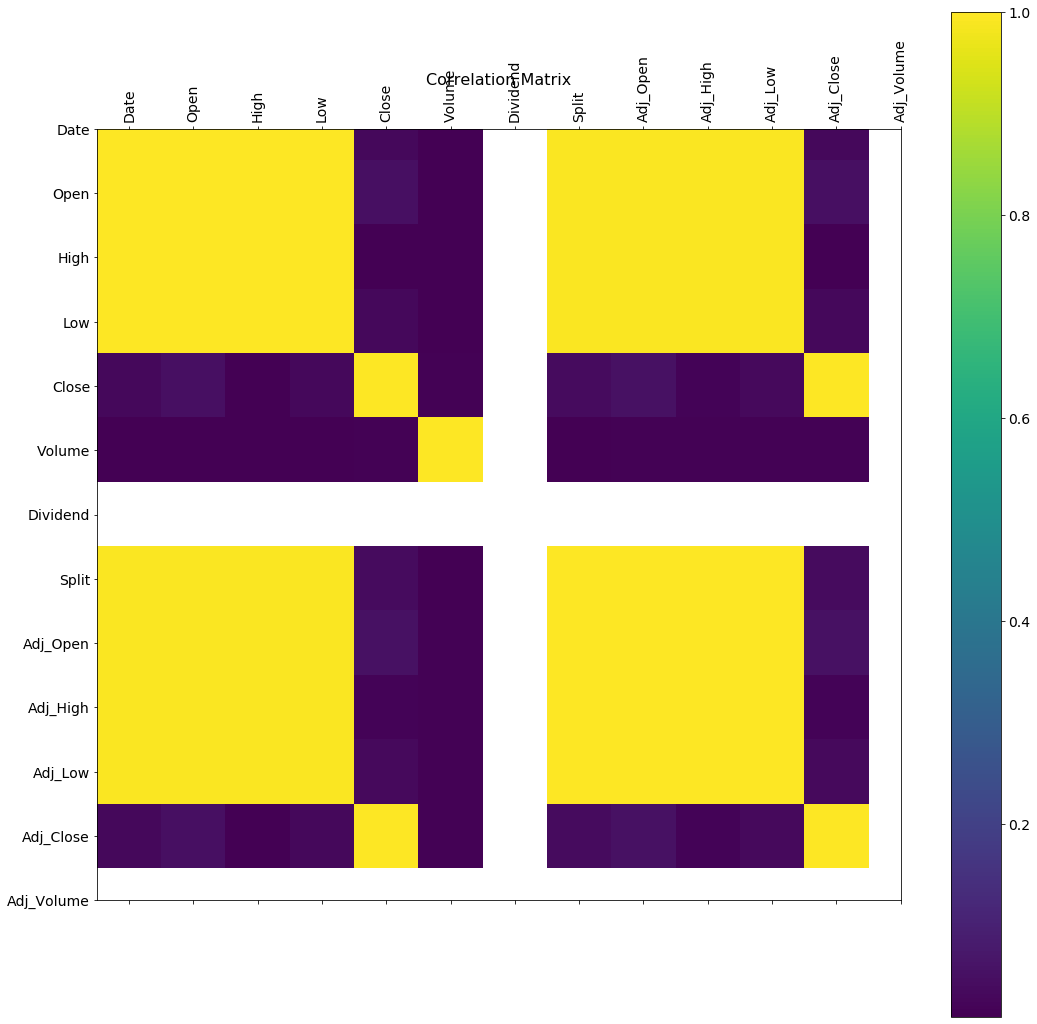

In [10]:
#Correlation verification
import matplotlib.pyplot as plt
f = plt.figure(figsize=(18, 18))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.savefig('Correlation Matrix.png')

In [11]:
#We could see that in the above plot there are columns which are highly correlated. So, will keep one column from each pair and will remove the other columns
cols = ['Adj_Open','Adj_High','Adj_Low','Adj_Close','Adj_Volume']
df.drop(cols, axis=1, inplace=True)

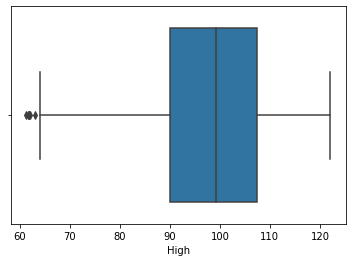

In [12]:
#Verifying the outliers and visualising for some columns
import seaborn as sns
sns.boxplot(x=df['High'])

(1090, 8)

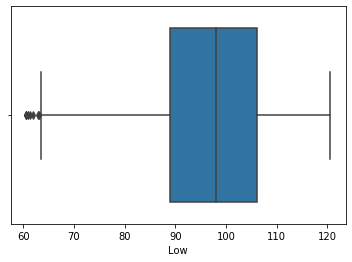

In [13]:
#Verifying the outliers and visualising for some columns
sns.boxplot(x=df['Low'])
df.shape

In [14]:
#IQR range to remove outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Open        1.754250e+01
High        1.749350e+01
Low         1.719000e+01
Close       1.732250e+01
Volume      2.985940e+06
Dividend    0.000000e+00
Split       0.000000e+00
dtype: float64


In [15]:
print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

      Close   Date  Dividend   High    Low   Open  Split  Volume
0     False  False     False  False  False  False  False   False
1     False  False     False  False  False  False  False   False
2     False  False     False  False  False  False  False   False
3     False  False     False  False  False  False  False   False
4     False  False     False  False  False  False  False   False
5     False  False     False  False  False  False  False   False
6     False  False     False  False  False  False  False   False
7     False  False     False  False  False  False  False   False
8     False  False     False  False  False  False  False   False
9     False  False     False  False  False  False  False   False
10    False  False     False  False  False  False  False   False
11    False  False     False  False  False  False  False   False
12    False  False     False  False  False  False  False   False
13    False  False     False  False  False  False  False   False
14    False  False     Fa

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [16]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [17]:
df.shape

(1006, 8)

In [18]:
# Storing the structured data into CSV file
df.to_csv(r'E:\DAP\Project\Disney.csv', index = False)

In [19]:
#Importing reqired packages for psotgreSQL
import psycopg2
import csv
import pandas.io.sql as sqlio

In [20]:
#Creating the database disney using try and exception blocks

try:
    dbConnection = psycopg2.connect(
    user = "postgres",
    password = "root",
    host = "localhost",
    port = "5433",
    database = "postgres")
    dbConnection.set_isolation_level(0) #Auto Commit
    dbCursor = dbConnection.cursor()
    #SQL query to create the database
    dbCursor.execute('CREATE DATABASE disney;')
    dbCursor.close()
except (Exception, psycopg2.Error) as dbError:
    print("Error while connecting to postgreSQL", dbError)
finally:
    if(dbConnection):dbConnection.close()

In [21]:
#Creating the bank table in the dinsey database using try and exception blocks

try:
    dbConnection = psycopg2.connect(
    user = "postgres",
    password = "root",
    host = "localhost",
    port = "5433",
    database = "postgres")
    dbConnection.set_isolation_level(0) #Auto Commit
    dbCursor = dbConnection.cursor()
    #SQL query to create the table
    dbCursor.execute("""
    CREATE TABLE disney_stockdetails(
    Date timestamp PRIMARY KEY,
    Open double precision,
    High double precision,
    Low double precision,
    Close double precision,
    Volume integer,
    Dividend integer,
    Split integer
    );""")
    dbCursor.close()
except (Exception, psycopg2.Error) as dbError:
    print("Error while creating the table: ", dbError)
finally:
    if(dbConnection): dbConnection.close()

In [22]:
#Loading the data from CSV file into postgreSQL using try and exception blocks

try:
    dbConnection = psycopg2.connect(
    user = "postgres",
    password = "root",
    host = "localhost",
    port = "5433",
    database = "postgres")
    dbConnection.set_isolation_level(0) # Auto Commit
    dbCursor = dbConnection.cursor()
    #SQL query to insert the values
    insertString = "INSERT INTO disney_stockdetails VALUES ('{}'," + "{},"*6 +"{})"
    with open("E:/DAP/Project/Disney.csv",'r') as s:
        reader = csv.reader(s)
        next(reader) #Skip the header
        for row in reader:
            dbCursor.execute(insertString.format(*row))
    dbConnection.commit()
    dbCursor.close()
except (Exception, psycopg2.Error) as dbError:
    print("Error while inserting values: ", dbError)
finally:
    if(dbConnection): dbConnection.close()

In [25]:
#Pulling the loaded data from postgreSQl and loading into a dataframe using try and exception blocks

#SQl query to pull the data
sql = "SELECT * FROM disney_stockdetails"

try:
    dbConnection = psycopg2.connect(
    user = "postgres",
    password = "root",
    host = "localhost",
    port = "5433",
    database = "postgres")
    #creating the dataframe and loading into it
    df = sqlio.read_sql(sql, dbConnection)
except (Exception, psycopg2.Error) as dbError:
    print("Error while pulling the data: ", dbError)
finally:
    if(dbConnection): dbConnection.close()

In [26]:
#Displaying the dataframe

df

,date,open,high,low,close,volume,dividend,split
0,2017-12-28,108.000,108.0500,107.0600,107.77,3477599,0,1
1,2017-12-27,108.420,108.5500,107.4550,107.64,5624037,0,1
2,2017-12-26,108.490,109.3700,107.8900,108.12,3982398,0,1
3,2017-12-22,109.400,109.6850,108.4500,108.67,7377990,0,1
4,2017-12-21,109.520,111.0900,109.1892,109.57,9366706,0,1
5,2017-12-20,111.625,112.3000,109.6900,109.69,8661018,0,1
6,2017-12-19,111.050,112.3900,110.7700,111.81,10546010,0,1
7,2017-12-18,111.850,111.9900,110.3050,111.03,12269462,0,1
8,2017-12-13,108.150,108.1900,106.7500,107.61,10363604,0,1
9,2017-12-12,107.600,107.8300,106.5850,107.43,8132464,0,1


In [27]:
#Importing the necessary packages

import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import tools
import chart_studio.plotly as py
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [28]:
#Calling the dataframe
df
#stock_price=df.copy()
df.head()

,date,open,high,low,close,volume,dividend,split
0,2017-12-28,108.00,108.050,107.0600,107.77,3477599,0,1
1,2017-12-27,108.42,108.550,107.4550,107.64,5624037,0,1
2,2017-12-26,108.49,109.370,107.8900,108.12,3982398,0,1
3,2017-12-22,109.40,109.685,108.4500,108.67,7377990,0,1
4,2017-12-21,109.52,111.090,109.1892,109.57,9366706,0,1


In [29]:
#Checking the count, mean, std, min and max
df.describe()

,open,high,low,close,volume,dividend,split
count,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03,1006.0,1006.0
mean,96.731543,97.326036,96.076253,96.725159,6.780382e+06,0.0,1.0
std,13.057691,13.088413,13.009678,13.055590,2.012320e+06,0.0,0.0
min,64.020000,64.770000,63.830000,64.000000,2.166034e+06,0.0,1.0
25%,89.275000,89.855000,88.797500,89.467500,5.300391e+06,0.0,1.0
50%,98.535000,99.104950,98.007500,98.565000,6.455580e+06,0.0,1.0
75%,106.927500,107.489975,106.140000,106.920000,7.901214e+06,0.0,1.0
max,121.500000,122.080000,120.610000,121.690000,1.283792e+07,0.0,1.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 8 columns):
date        1006 non-null datetime64[ns]
open        1006 non-null float64
high        1006 non-null float64
low         1006 non-null float64
close       1006 non-null float64
volume      1006 non-null int64
dividend    1006 non-null int64
split       1006 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 63.0 KB


C:\Users\Gollamudi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning:

Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.

C:\Users\Gollamudi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning:

Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.

C:\Users\Gollamudi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:81: UserWarning:

Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.

C:\Users\Gollamudi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:71: UserWarning:

Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.

C:\Users\Gollamudi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:81: UserWarning:

Attempting to set identical bottom == top == 1.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002901881DFC8>,
      dtype=object)

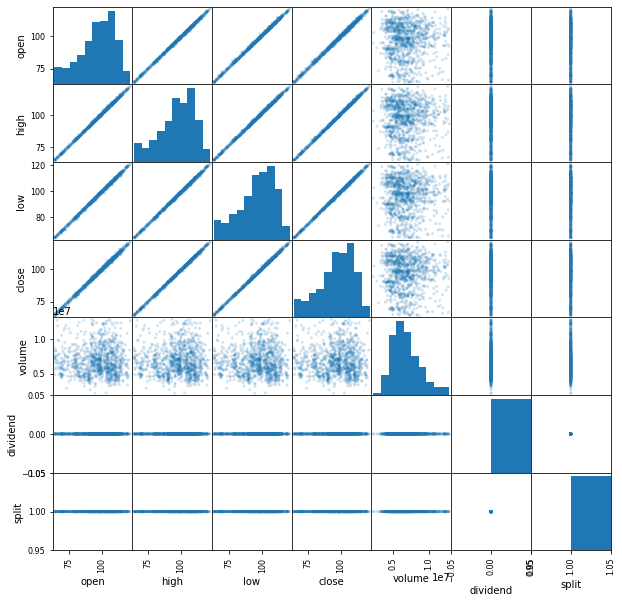

In [31]:
#Scatter matrix for all the columns
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(10, 10))

In [32]:
#Checking the differnce between the open and high columns using spread plot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
df[['high','open']].iplot(kind='spread')

In [33]:
df['volume'].iplot(kind='hist',bins=25)

In [34]:
#Visualising the open and close stock price of The Disney Company data using plotly
trace_one = go.Scatter(x = df.date, 
                       y = df['open'], 
                       name = "Disney open price", 
                       line = dict(color = "#17BECF"), 
                       opacity = 0.8)

trace_two = go.Scatter(x = df.date,
                      y = df['close'],
                      name = "Disney close price",
                      line = dict(color = "#7F7F7F"),
                      opacity = 0.8)

data = [trace_one, trace_two]

layout = dict(title = "Opening and Closing Stock Price of The Disney Company")
fig = dict(data=data, layout=layout)
iplot(fig, filename = "The Disney Stock Comparison Open/Close")

In [35]:
#Checking the linear relationship between volume, hihgh and low using plotly 3D scatter plot
x = df["volume"]
y = df["high"]
z = df["low"]

trace = go.Scatter3d(
    x = x, 
    y = y, 
    z = z,
    mode = "markers", 
    marker=dict(
        size = 12, 
        color = z, 
        colorscale = "Viridis", 
        opacity = 0.8))

data = [trace]

layout = go.Layout(
    margin=dict(
        l = 0, 
        r = 0, 
        b = 0, 
        t = 0))

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename="Relation between 3 variables")

In [36]:
# Changing the date column as index column to plot the data in a clear way with years, months and days
df['date'] = df['date'].apply(pd.to_datetime)
df.info()
df.set_index('date', inplace=True)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 8 columns):
date        1006 non-null datetime64[ns]
open        1006 non-null float64
high        1006 non-null float64
low         1006 non-null float64
close       1006 non-null float64
volume      1006 non-null int64
dividend    1006 non-null int64
split       1006 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 63.0 KB


,open,high,low,close,volume,dividend,split
date,,,,,,,
2017-12-28,108.00,108.050,107.0600,107.77,3477599,0,1
2017-12-27,108.42,108.550,107.4550,107.64,5624037,0,1
2017-12-26,108.49,109.370,107.8900,108.12,3982398,0,1
2017-12-22,109.40,109.685,108.4500,108.67,7377990,0,1
2017-12-21,109.52,111.090,109.1892,109.57,9366706,0,1


In [37]:
#Manipulating Date column
from datetime import datetime
my_year = 2020
my_month = 4
my_day = 17
my_hour = 11
my_minute = 5
my_second = 50

In [38]:
test_date = datetime(my_year, my_month, my_day)
test_date
test_date = datetime(my_year, my_month, my_day, my_hour, my_minute, my_second)
print('The day is : ', test_date.day)
print('The hour is : ', test_date.hour)
print('The month is : ', test_date.month)#
#Checking the max and min dates of the data
print(df.index.min())
print(df.index.max())

The day is :  17
The hour is :  11
The month is :  4
2013-09-13 00:00:00
2017-12-28 00:00:00


Text(0, 0.5, 'Price')

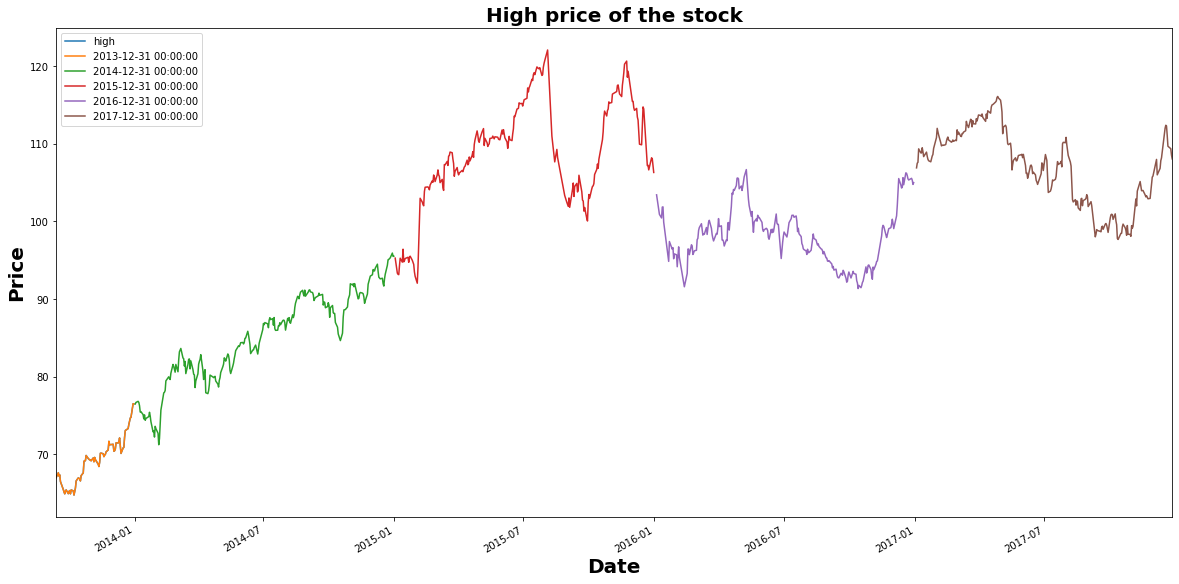

In [39]:
#Plotting the high column of stock price to compare with the volume column
df['high'].resample('A').plot(kind='line',figsize = (20,10))
#df['high'].resample('A').plot(kind='line',figsize = (20,10))
plt.title('High price of the stock', fontdict={'fontweight':'bold', 'fontsize':20})
plt.legend(prop={'size': 10})
plt.xlabel("Date", fontdict={'fontweight':'bold', 'fontsize':20})
plt.ylabel("Price", fontdict={'fontweight':'bold', 'fontsize':20})

Text(0, 0.5, 'Volume')

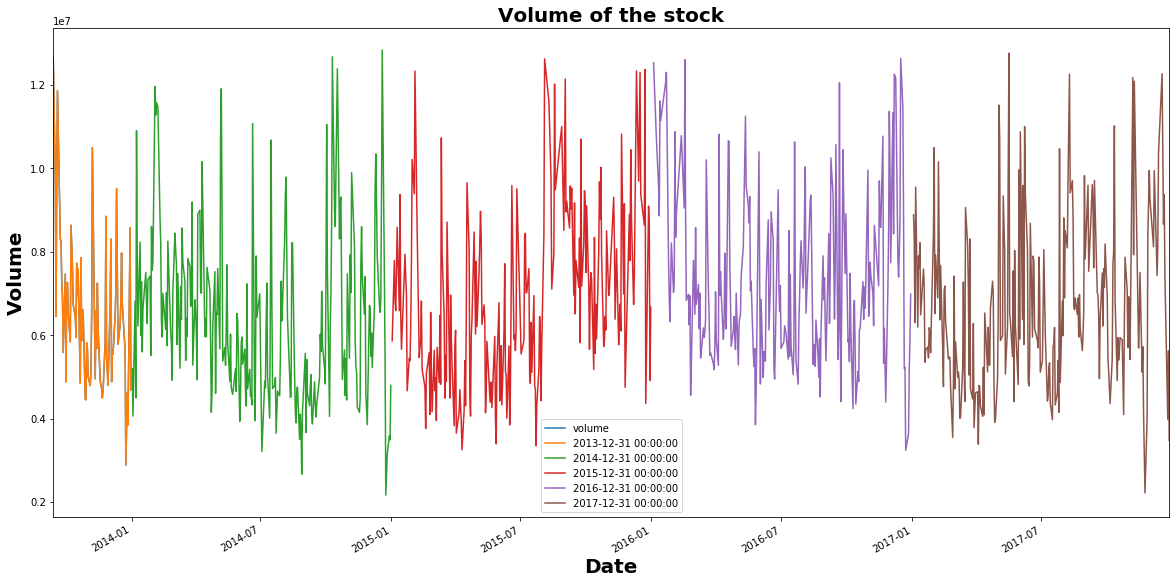

In [40]:
#Plotting the volume column of stock price to compare with the high column
df['volume'].resample('A').plot(figsize=(20,10),kind='line',)#title='Adjusted Closing Price')
plt.title('Volume of the stock', fontdict={'fontweight':'bold', 'fontsize':20})
plt.legend(prop={'size': 10})
plt.xlabel("Date", fontdict={'fontweight':'bold', 'fontsize':20})
plt.ylabel("Volume", fontdict={'fontweight':'bold', 'fontsize':20})

In [41]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [42]:
#For forecasting visualtion we have to take the target column and need to ignore the remaining columns
cols = ['open','low','close','volume','dividend','split']
df.drop(cols, axis=1, inplace=True)

In [43]:
#Verifying null values of the respective column
df
df.isnull().sum()

high    0
dtype: int64

In [44]:
#Resasmpling: To generate the graphs in python for time series analysis the date column shpuld be as index so that we can plot the stock price for monthly, yearly and daywise
stockprice_forecast = df['high'].resample('MS').mean()
#Verifying for 2017 as sample, we can see for remaining years as well
stockprice_forecast['2017']

date
2017-01-01    108.526168
2017-02-01    110.481111
2017-03-01    112.248696
2017-04-01    114.458221
2017-05-01    110.065510
2017-06-01    106.505952
2017-07-01    106.805526
2017-08-01    104.313295
2017-09-01     99.545535
2017-10-01     99.281445
2017-11-01    102.988606
2017-12-01    109.008929
Freq: MS, Name: high, dtype: float64

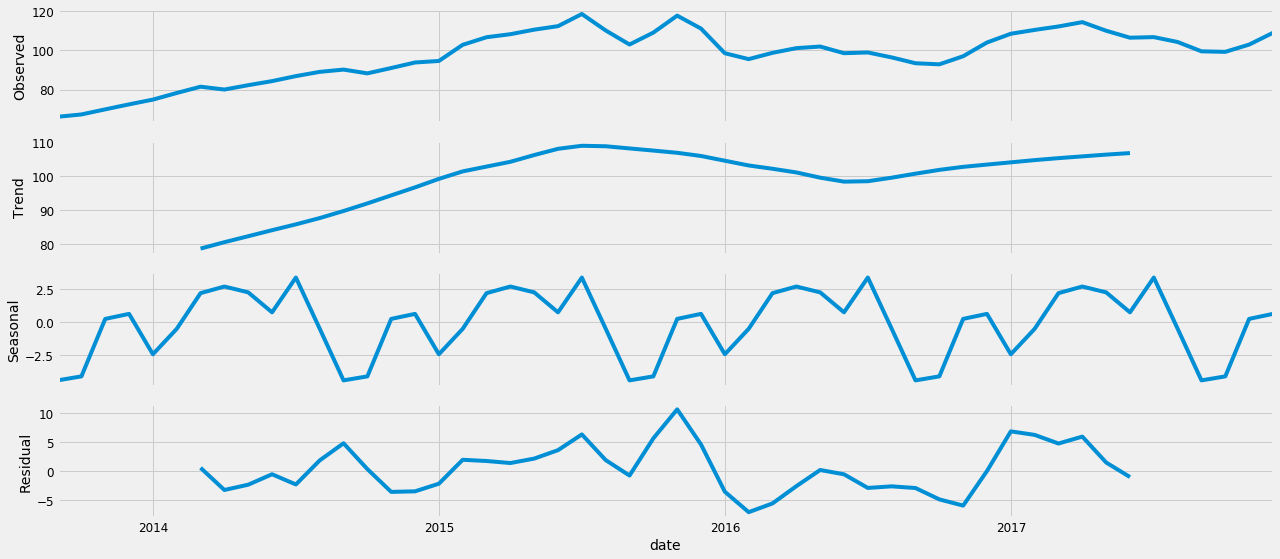

In [45]:
#Decomposing the data to verify the seasonality, trend and randomnes by visualising
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(stockprice_forecast, model='additive')
fig = decomposition.plot()
plt.show()

#From the below visualisation we can clearly see that there is a seasonality and trend in the graph

In [46]:
#To forecast the high stock price we are applying the best statistical model which is ARIMA model on our data
#Setting the p,d,q range and arrabging ARIMA for our analysis
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [47]:
#Validatiing which ARIMA model will be good fit for our data to forecast
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(stockprice_forecast, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:615.2099566903416
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:452.09024986831866
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:334.01265182015976
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1126.1459491589449
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:338.59752026738727
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:317.32730799451986
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:222.03882801990636
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1019.8914868163564
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:541.3614388501019
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:394.33244689439135
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:280.3784931043806
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1969.6827406566258
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:293.8880779153163
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:268.17967749607925
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:194.40278525901283
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1899.272302199373
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:289.3130353669198
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:229.9111826345527

In [48]:
bestfit = sm.tsa.statespace.SARIMAX(stockprice_forecast, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
results = bestfit.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0995      0.326      0.305      0.760      -0.539       0.738
ma.L1          0.5731      0.349      1.644      0.100      -0.110       1.256
ar.S.L12      -0.3724      0.320     -1.162      0.245      -1.000       0.256
ma.S.L12      -0.4761      0.706     -0.674      0.500      -1.859       0.907
sigma2        16.6482      9.552      1.743      0.081      -2.074      35.370


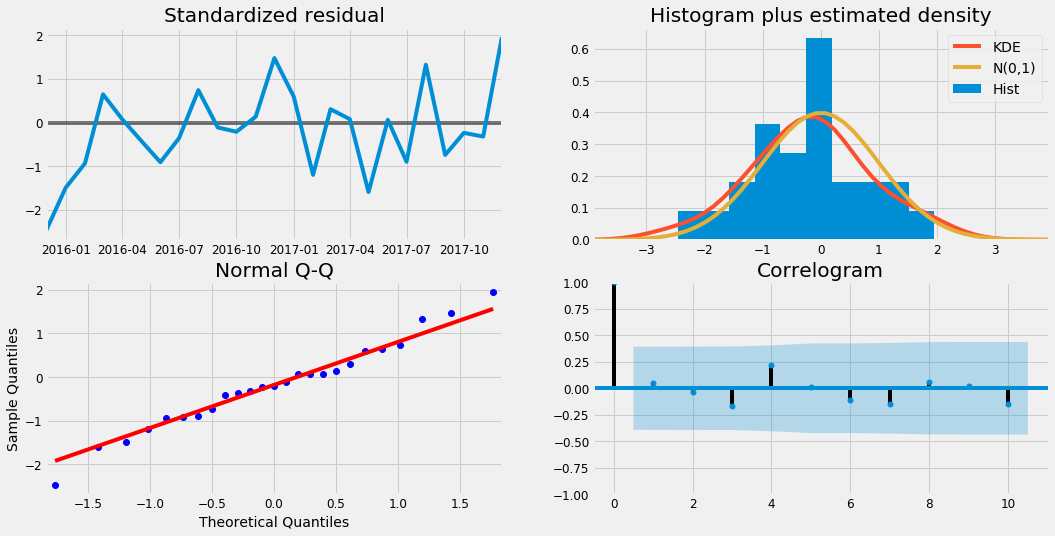

In [49]:
#Veriying the whether there is unusal behaviour in our data with the help of histogram, residual plot, linear plot and correlation plot
results.plot_diagnostics(figsize=(16, 8))
plt.show()

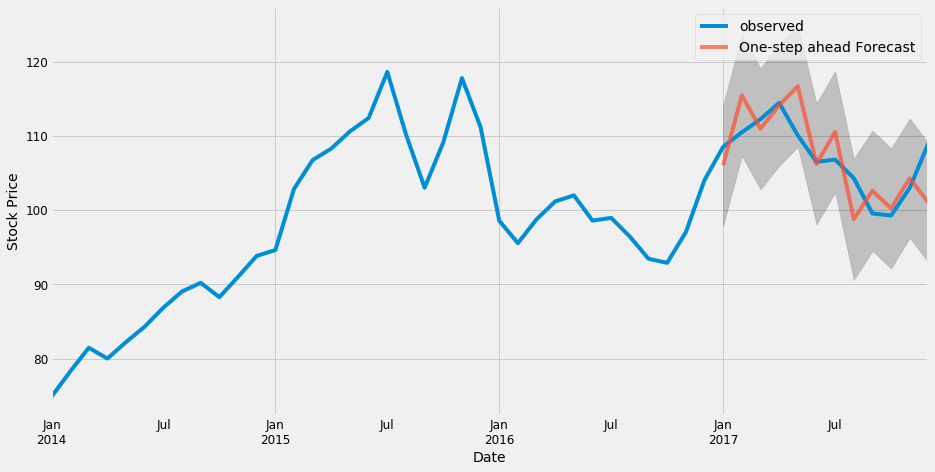

In [50]:
#Validating forecasts
#Verifying the forecast values with the original values by plotting both on the same graph as below
predi = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
predi_ci = predi.conf_int()
ax = stockprice_forecast['2014':].plot(label='observed')
predi.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(predi_ci.index, predi_ci.iloc[:, 0], predi_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
plt.legend()
plt.show()

In [51]:
#From the abobe graph we could clearly see that our forecast values are following the historical data very well
#The smaller the MSE value, the closer we are to finding the line of best fit.
#Verfying the Mean squared error of our model
stockprice_forecast_forecasted = predi.predicted_mean
stockprice_forecast_truth = stockprice_forecast['2017-01-01':]
mse = ((stockprice_forecast_forecasted - stockprice_forecast_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
#Verifying the root mean squared error of our model
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 16.43
The Root Mean Squared Error of our forecasts is 4.05


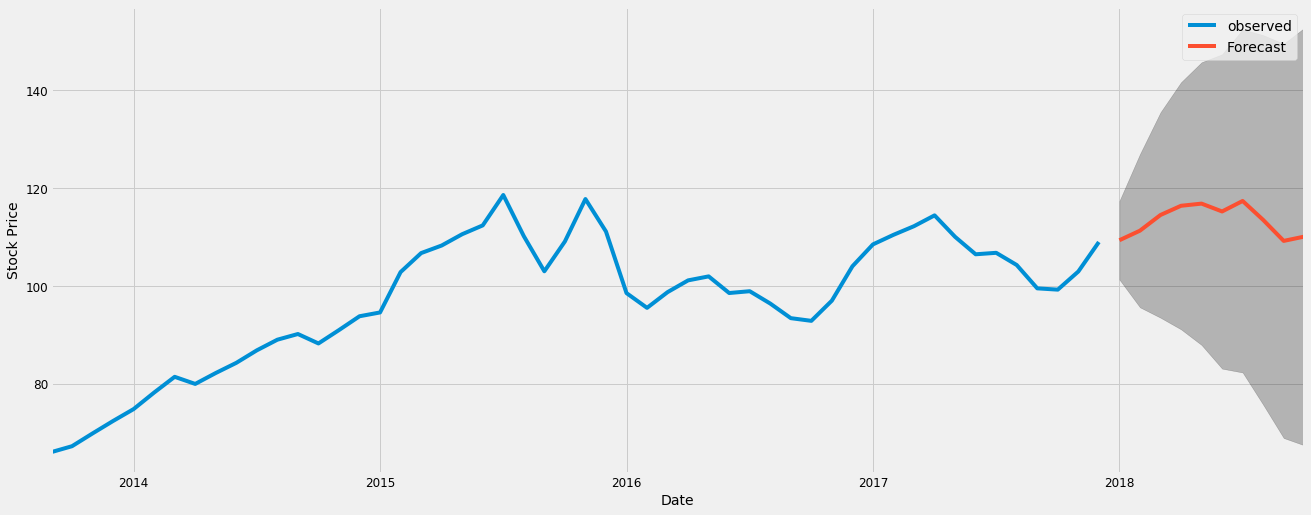

In [52]:
#Visualising the forecasted values
predi_uc = results.get_forecast(steps=10)
predi_ci = predi_uc.conf_int()
ax = stockprice_forecast.plot(label='observed', figsize=(20, 8))
predi_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(predi_ci.index,
                predi_ci.iloc[:, 0],
                predi_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
plt.legend()
plt.show()